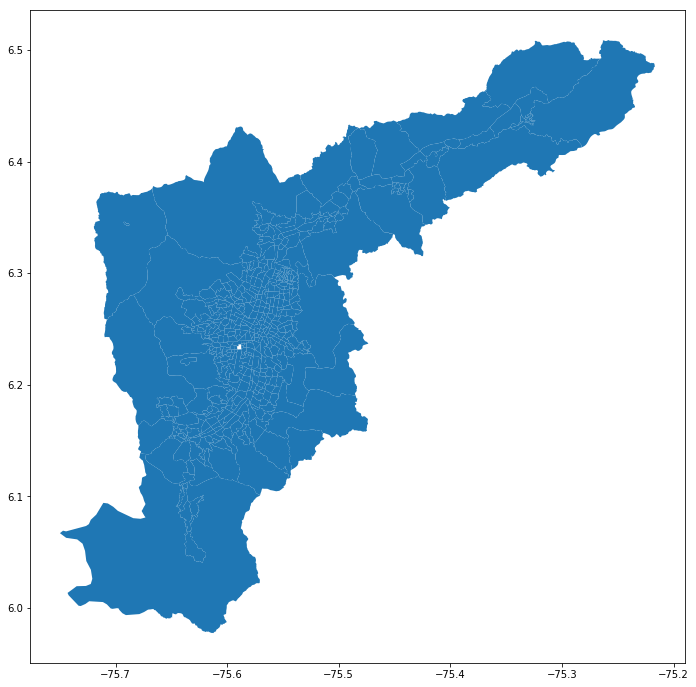

In [1]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from shapely.ops import cascaded_union
from shapely.geometry import Polygon
%matplotlib inline

aburra_valley = gp.read_file("maps/EOD.shp")
# Plotting
aburra_valley.plot(figsize=(12, 12))
plt.show()

In [2]:
print(aburra_valley.head())

  SIT_2017  Ejemplo_EO SIT_Urban  \
0      372      1409.9     URBAN   
1      364       402.8     URBAN   
2      618       491.1     URBAN   
3      613       730.0     URBAN   
4      125      7218.8     URBAN   

                                            geometry  
0  POLYGON ((-75.56230213752727 6.328748454069691...  
1  POLYGON ((-75.55033011256714 6.329386326746962...  
2  POLYGON ((-75.49851285956038 6.358192179318264...  
3  POLYGON ((-75.52777093976739 6.307813882886017...  
4  POLYGON ((-75.53838829881064 6.248307776749133...  


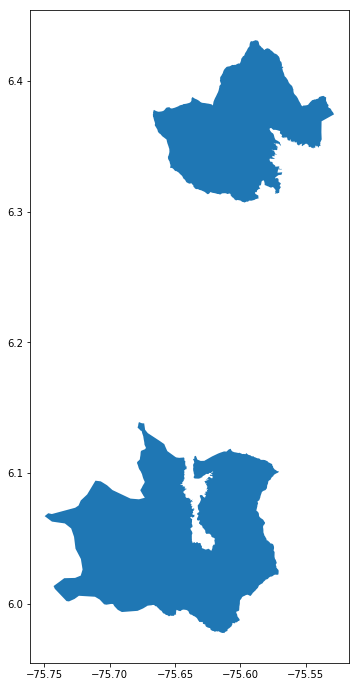

In [3]:
# Reduce small places
to_eliminate = []
for index, row in aburra_valley.iterrows():
    if row['geometry'].area < 5.5e-3:
        to_eliminate.append(index)

aburra_less = aburra_valley.drop(to_eliminate, axis=0)
aburra_less.plot(figsize=(12, 12))
plt.show()

In [4]:
# Create aburra merged
aburra_merged = aburra_valley.unary_union #aburra_less.unary_union

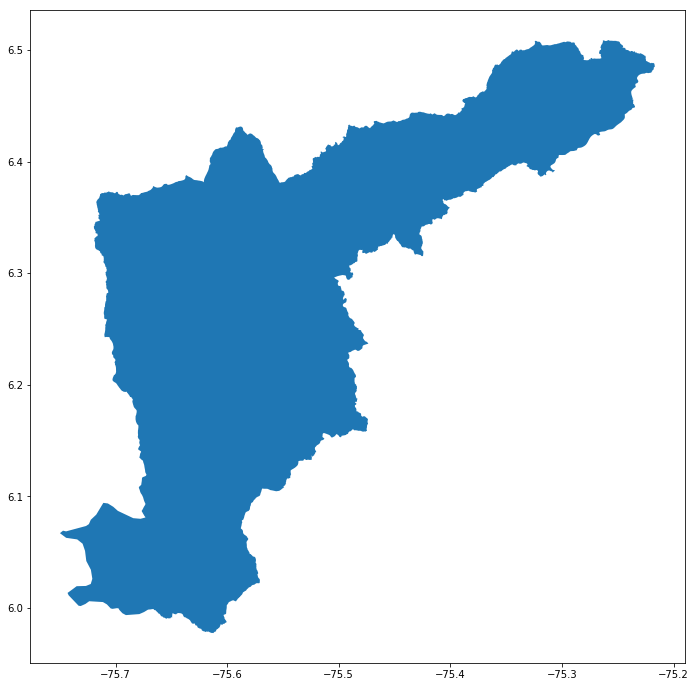

In [9]:
aburra_valley_polygon = aburra_merged #list(aburra_merged)[0]
x, y = aburra_valley_polygon.exterior.coords.xy
coord = np.dstack((x, y)).tolist()

plotting = False
if plotting:
    for i in range(len(coord[0]) - 1):
        plt.plot((coord[0][i][0], coord[0][i + 1][0]), (coord[0][i][1], coord[0][i + 1][1]), 'k')

    plt.show()
    
border_valley = gp.GeoSeries(Polygon(coord[0]))
border_valley.plot(figsize=(12, 12))
plt.show()

border_valley.to_file("maps/EOD_border.shp", driver="ESRI Shapefile")